In [ ]:
# 1. population.csv 파일을 DataFrame으로 읽고 내용 확인
# 2. 현재 연구자 거주지 동의 인구 정보 조회 ( 행전체 )

# -> "1,234,567" -> "1234567" -> 1234567

# 3. 총인구수가 가장 많은 동 조회 ( 읍면동 단위 )

# 4. 남성인구비가 가장 높은 동 조회 ( 읍면동 단위 )
# 5. 도시 법정동 1선정, 농촌 법정동 1선정, 인구 분포 비교 ( 읍면동 단위, bar plot 사용 )
# 6. 현재 연구자 거주지 동의 연령별 인구를 그래프로 표시

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
population = pd.read_csv('data-files/population.csv', low_memory=False)

In [3]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Columns: 310 entries, 행정구역 to 2024년09월_여_100세 이상
dtypes: int64(7), object(303)
memory usage: 9.2+ MB


In [44]:
population[population['행정구역'].str.contains('역삼')] # --> 393 선택
population[population['행정구역'].str.contains('신안')] # --> 3155 선택
# population.loc[3155]
population.loc[393]


행정구역                  서울특별시 강남구 역삼2동(1168065000)
2024년09월_계_총인구수                            36338
2024년09월_계_연령구간인구수                         36338
2024년09월_계_0세                                109
2024년09월_계_1세                                102
                                 ...            
2024년09월_여_96세                                 3
2024년09월_여_97세                                 1
2024년09월_여_98세                                 1
2024년09월_여_99세                                 1
2024년09월_여_100세 이상                             2
Name: 393, Length: 310, dtype: object

In [5]:
population.head(3)

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
0,서울특별시 (1100000000),"9,350,995","9,350,995","38,100","38,486","40,625","42,608","44,377","47,757","51,072",...,"6,767","5,474","3,921","3,343","2,623","1,892","1,391",776,523,"1,184"
1,서울특별시 종로구 (1111000000),"138,879","138,879",415,419,467,471,516,512,580,...,131,105,87,63,52,46,34,21,8,33
2,서울특별시 종로구 청운효자동(1111051500),"11,143","11,143",52,35,43,48,46,50,50,...,13,10,11,3,6,4,1,2,0,4


In [6]:
# Series.str : Series에 포함된 문자열 각각에 적용할 함수를 포함하는 객체 (내장된 반복문 실행)
dong_filter = population['행정구역'].str.contains('동삭동')
population[dong_filter]

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
1527,경기도 평택시 동삭동(4122065000),"42,024","42,024",527,527,507,492,517,538,568,...,8,6,8,2,2,1,1,2,1,0


In [7]:
# "1,234,567" -> "1234567" -> 1234567

print ( population["2024년09월_계_총인구수"].dtype )

population["2024년09월_계_총인구수"] = \
    population["2024년09월_계_총인구수"].map(lambda v : int(str(v).replace(",", "")))

object


In [21]:
population["2024년09월_계_총인구수"].dtype

dtype('int64')

In [24]:
population["행정구역"]

0                서울특별시  (1100000000)
1             서울특별시 종로구 (1111000000)
2        서울특별시 종로구 청운효자동(1111051500)
3          서울특별시 종로구 사직동(1111053000)
4          서울특별시 종로구 삼청동(1111054000)
                    ...             
3905    제주특별자치도 서귀포시 서홍동(5013058000)
3906    제주특별자치도 서귀포시 대륜동(5013059000)
3907    제주특별자치도 서귀포시 대천동(5013060000)
3908    제주특별자치도 서귀포시 중문동(5013061000)
3909    제주특별자치도 서귀포시 예래동(5013062000)
Name: 행정구역, Length: 3910, dtype: object

In [8]:
area_mask = population['행정구역'].map(lambda v: v[-6] != '0') # 동 행정구역 찾기
max_value = population[area_mask]["2024년09월_계_총인구수"].max()
max_value

population[ population["2024년09월_계_총인구수"] == max_value ]


,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
3715,경상남도 양산시 물금읍(4833025300),117160,"117,160",643,739,845,882,"1,114","1,169","1,403",...,46,42,31,18,24,12,4,5,4,9


In [ ]:
# 4. 남성인구비가 가장 높은 동 조회 ( 읍면동 단위 )
#    3개 컬럼 활용 : "2024년09월_계_총인구수", 
#                   "2024년09월_남_총인구수", "2024년09월_여_총인구수"

In [20]:
population.columns

Index(['행정구역', '2024년09월_계_총인구수', '2024년09월_계_연령구간인구수', '2024년09월_계_0세',
       '2024년09월_계_1세', '2024년09월_계_2세', '2024년09월_계_3세', '2024년09월_계_4세',
       '2024년09월_계_5세', '2024년09월_계_6세',
       ...
       '2024년09월_여_91세', '2024년09월_여_92세', '2024년09월_여_93세', '2024년09월_여_94세',
       '2024년09월_여_95세', '2024년09월_여_96세', '2024년09월_여_97세', '2024년09월_여_98세',
       '2024년09월_여_99세', '2024년09월_여_100세 이상'],
      dtype='object', length=310)

In [24]:
def value_to_int(v):
    if not v or str(v) == 'nan':
        return 0
    
    str_v = str(v)
    replaced_v = str_v.replace(",", "")
    int_v = int(replaced_v)
    
    return int_v

for column in population.columns[1:]:
    # print(column)
    # population[column] = population[column].map(lambda v : int(str(v).replace(",", "")))
    # population[column] = population[column].map(lambda v : int(str(v).replace(",", "")) if v and str(v) != "nan" else 0)
    population[column] = population[column].map(value_to_int)

In [ ]:
population.dtypes

In [32]:
male_ratio = population["2024년09월_남_총인구수"] / population["2024년09월_계_총인구수"]
print( type(male_ratio) )
# male_ratio
# male_ratio.argmax() # argmax : 가장 큰 값이 있는 행 index
# population.loc[male_ratio.argmax()] # loc[행인덱스, 열인덱스] # 열인덱스 생략 가능
print( male_ratio.max(), male_ratio.min() )
population.loc[male_ratio.argmin()] # loc[행인덱스, 열인덱스] # 열인덱스 생략 가능

<class 'pandas.core.series.Series'>
0.6537174276834807 0.4086599031894437


행정구역                  서울특별시 성북구 동선동(1129057500)
2024년09월_계_총인구수                           15081
2024년09월_계_연령구간인구수                        15081
2024년09월_계_0세                                31
2024년09월_계_1세                                27
                                ...            
2024년09월_여_96세                                2
2024년09월_여_97세                                1
2024년09월_여_98세                                1
2024년09월_여_99세                                3
2024년09월_여_100세 이상                            3
Name: 121, Length: 310, dtype: object

In [ ]:
# 5. 도시 법정동 1선정, 농촌 법정동 1선정, 인구 분포 비교 ( 읍면동 단위, bar plot 사용 )
#    2024년09월_계_0세 ~ 2024년09월_계_100세 컬럼의 데이터 사용


In [69]:
population[population['행정구역'].str.contains('창평면')]
population[population['행정구역'].str.contains('역삼')]

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
392,서울특별시 강남구 역삼1동(1168064000),34292,34292,114,88,71,76,70,60,67,...,13,8,7,11,5,3,5,3,0,2
393,서울특별시 강남구 역삼2동(1168065000),36338,36338,109,102,105,131,128,173,211,...,8,8,16,5,2,3,1,1,1,2


In [59]:
# 특정 지역의 0세 ~ 100세 데이터를 찾아서 ndarray로 저장
population_per_age392 = population.loc[393, '2024년09월_계_0세':'2024년09월_계_100세 이상'].values # 역삼2동
population_per_age2942 = population.loc[2942, '2024년09월_계_0세':'2024년09월_계_100세 이상'].values # 창평면

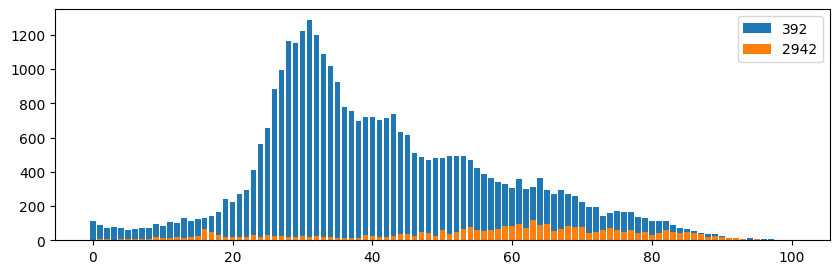

In [78]:
plt.figure(figsize=(10, 3))
plt.bar(np.arange(101), population_per_age392, label='392')
plt.bar(np.arange(101), population_per_age2942, label='2942')
plt.legend()
plt.show()

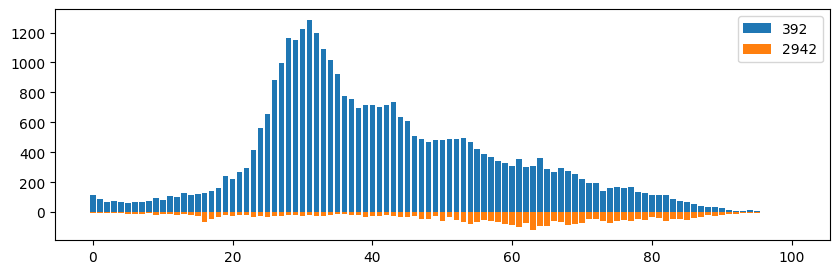

In [79]:
plt.figure(figsize=(10, 3))
plt.bar(np.arange(101), population_per_age392, label='392')
plt.bar(np.arange(101), -population_per_age2942, label='2942')
plt.legend()
plt.show()

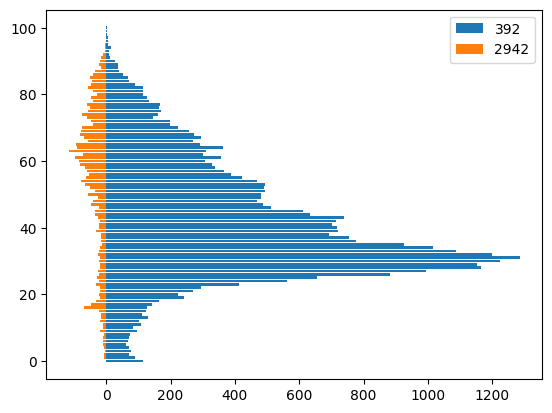

In [80]:
plt.barh(np.arange(101), population_per_age392, label='392')
plt.barh(np.arange(101), -population_per_age2942, label='2942')
plt.legend()
plt.show()

In [81]:
population_per_age_ratio392 = population_per_age392 / population_per_age392.sum() * 100
population_per_age_ratio2942 = population_per_age2942 / population_per_age2942.sum() * 100

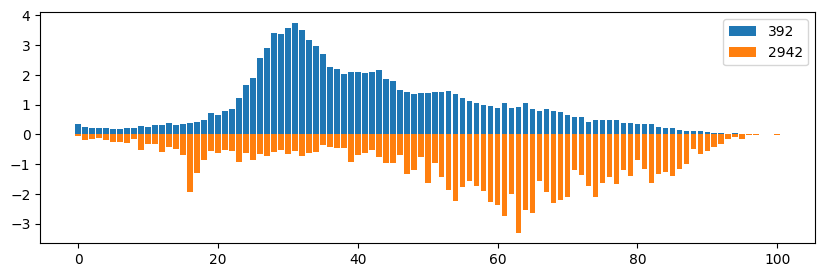

In [82]:
plt.figure(figsize=(10, 3))
plt.bar(np.arange(101), population_per_age_ratio392, label='392')
plt.bar(np.arange(101), -population_per_age_ratio2942, label='2942')
plt.legend()
plt.show()

In [ ]:
# 추가 과제 : 남성 인구비가 가장 높은 지역 (월롱)의 남 여 인구 구성 시각화 (bar-plot)
# 추가 과제 : 여성 인구비가 가장 높은 지역 (동선동)의 남 여 인구 구성 시각화 (bar-plot)

In [ ]:
# 6. 현재 연구자 거주지 동의 연령별 인구를 그래프로 표시

In [86]:
idx = population[population['행정구역'].str.contains('동삭동')].index
idx[0]

np.int64(1527)

In [88]:
# 특정 지역의 0세 ~ 100세 데이터를 찾아서 ndarray로 저장
t_pop_per_age = population.loc[idx[0], '2024년09월_계_0세':'2024년09월_계_100세 이상'].values # 역삼2동
m_pop_per_age = population.loc[idx[0], '2024년09월_남_0세':'2024년09월_남_100세 이상'].values # 역삼2동
f_pop_per_age = population.loc[idx[0], '2024년09월_여_0세':'2024년09월_여_100세 이상'].values # 창평면

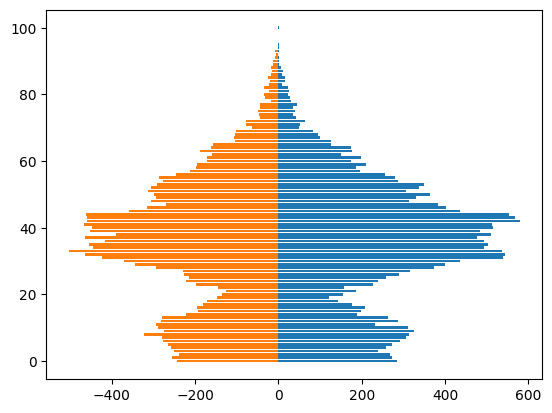

In [90]:
plt.barh(np.arange(101), m_pop_per_age, label='male')
plt.barh(np.arange(101), -f_pop_per_age, label='female')
plt.show()

In [ ]:
# 이 지역은 40대 및 20세 미만 인구가 많은 지역으로 확인됨
# 